<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2026-01-01 20:45:07--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  64.2MB/s    in 2.4s    

2026-01-01 20:45:10 (64.2 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



<Figure size 1000x600 with 0 Axes>

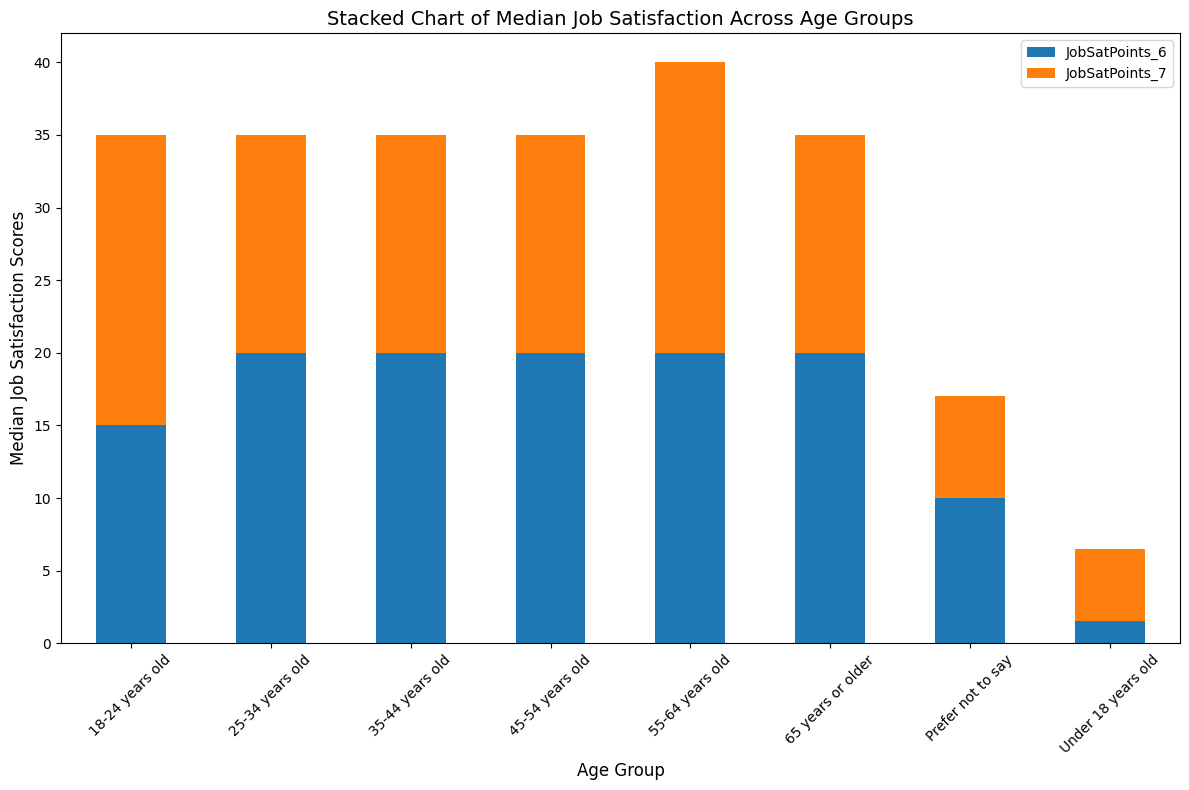

In [7]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "survey-data.csv"
df = pd.read_csv(file_path)

# Convert relevant columns to numeric, handling errors or missing data
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['JobSatPoints_7'] = pd.to_numeric(df['JobSatPoints_7'], errors='coerce')

# Group by Age and calculate the median satisfaction scores
age_grouped = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
age_grouped.plot(kind='bar', stacked=True, figsize=(12, 8))

# Adding labels and title
plt.title('Stacked Chart of Median Job Satisfaction Across Age Groups', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Median Job Satisfaction Scores', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()
plt.show()


##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


/tmp/ipykernel_2527/3163665706.py:32: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

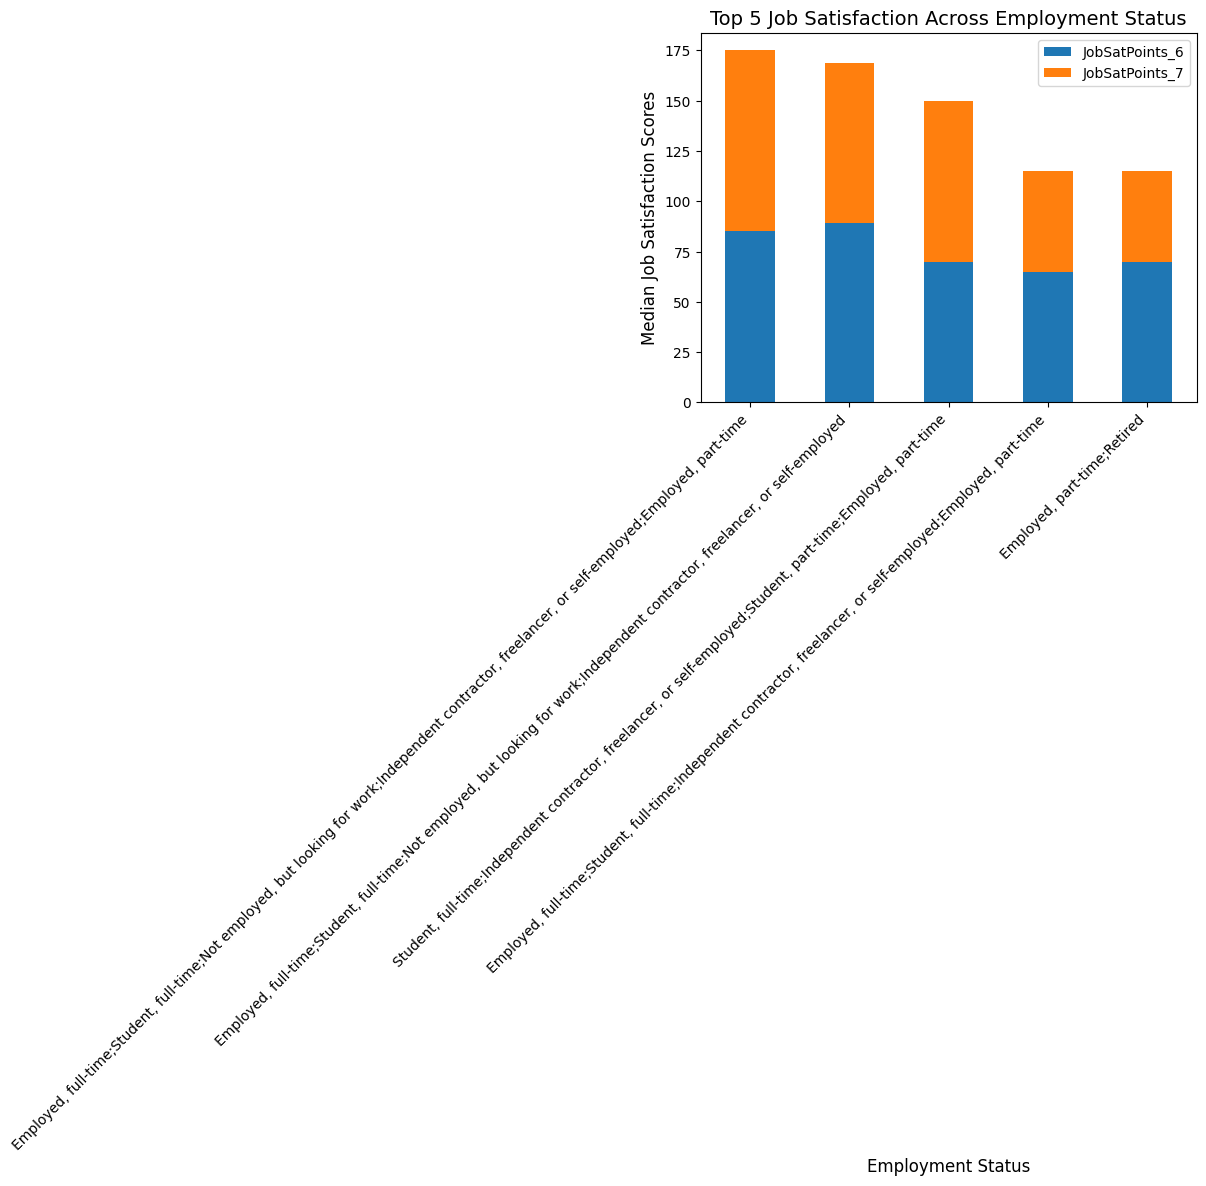

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "survey-data.csv"
df = pd.read_csv(file_path)

# Convert relevant columns to numeric, handling errors or missing data
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['JobSatPoints_7'] = pd.to_numeric(df['JobSatPoints_7'], errors='coerce')

# Group by Employment and calculate the median satisfaction scores
employment_grouped = df.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Sort the grouped data by the sum of JobSatPoints_6 and JobSatPoints_7 and select the top 5
employment_grouped['Total_Satisfaction'] = employment_grouped['JobSatPoints_6'] + employment_grouped['JobSatPoints_7']
top_5_employment = employment_grouped.sort_values('Total_Satisfaction', ascending=False).head(5)

# Plot the stacked bar chart for the top 5 employment statuses
plt.figure(figsize=(12, 8))
top_5_employment.drop('Total_Satisfaction', axis=1).plot(kind='bar', stacked=True)

# Adding labels and title
plt.title('Top 5 Job Satisfaction Across Employment Status', fontsize=14)
plt.xlabel('Employment Status', fontsize=12)
plt.ylabel('Median Job Satisfaction Scores', fontsize=12)

# Adjust the x-axis labels for readability
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees for better alignment

# Display the chart
plt.tight_layout()
plt.show()


### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']
Rows after filtering age groups 25-44: 38853


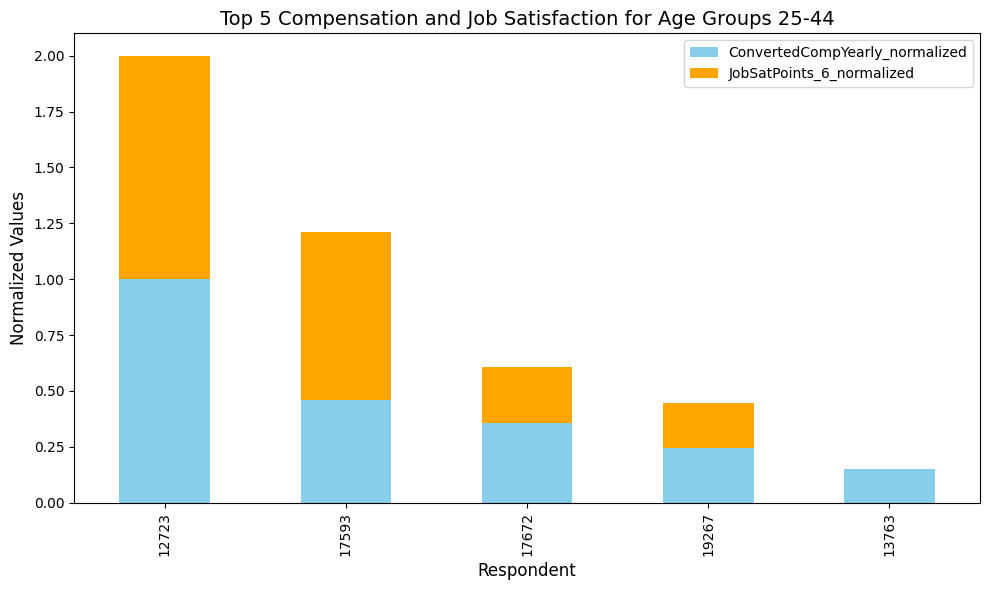

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "survey-data.csv"
df = pd.read_csv(file_path)

# Display unique values in the 'Age' column to check its format
print(df['Age'].unique())

# Convert relevant columns to numeric, handle errors or missing data
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Combine the 25-34 and 35-44 age groups
df_filtered = df[df['Age'].isin(['25-34 years old', '35-44 years old'])]

# Check how many rows we have after filtering
print(f"Rows after filtering age groups 25-44: {len(df_filtered)}")

# Ensure that we have data for both Compensation and Job Satisfaction
df_filtered = df_filtered.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

# Normalize the columns (Min-Max Scaling)
comp_min = df_filtered['ConvertedCompYearly'].min()
comp_max = df_filtered['ConvertedCompYearly'].max()
df_filtered['ConvertedCompYearly_normalized'] = (df_filtered['ConvertedCompYearly'] - comp_min) / (comp_max - comp_min)

job_sat_min = df_filtered['JobSatPoints_6'].min()
job_sat_max = df_filtered['JobSatPoints_6'].max()
df_filtered['JobSatPoints_6_normalized'] = (df_filtered['JobSatPoints_6'] - job_sat_min) / (job_sat_max - job_sat_min)

# Sort the filtered dataframe by compensation and select the top 5 respondents
df_filtered_sorted = df_filtered.nlargest(5, 'ConvertedCompYearly')

# Plot the stacked bar chart for the top 5 respondents based on compensation
ax = df_filtered_sorted[['ConvertedCompYearly_normalized', 'JobSatPoints_6_normalized']].plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange'])

# Add labels and title
plt.title('Top 5 Compensation and Job Satisfaction for Age Groups 25-44', fontsize=14)
plt.xlabel('Respondent', fontsize=12)
plt.ylabel('Normalized Values', fontsize=12)

# Show the chart
plt.tight_layout()
plt.show()


##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


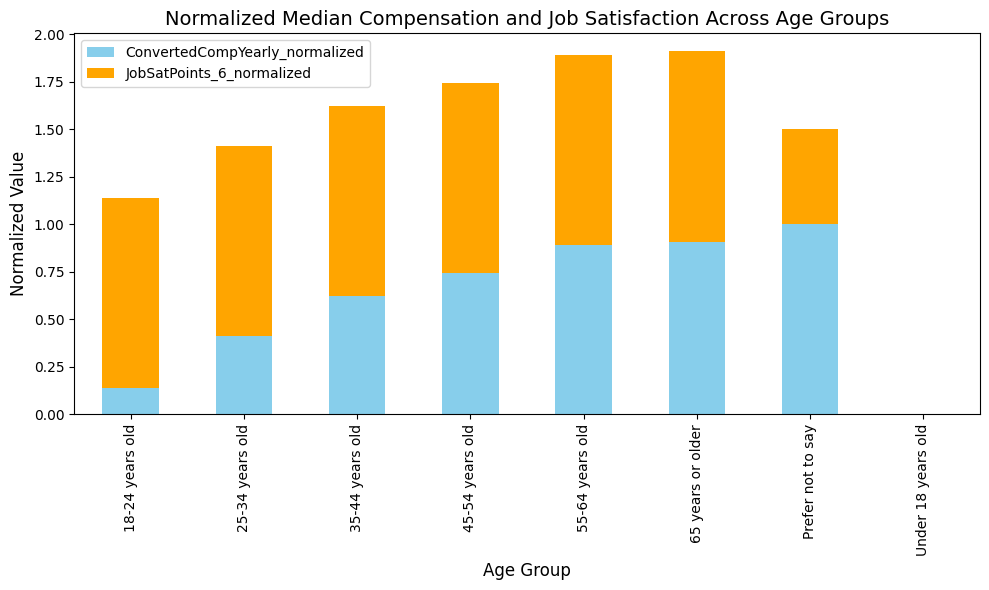

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Clean up data: Convert relevant columns to numeric, handle missing values
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Drop rows where either compensation or job satisfaction is missing
df_cleaned = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

# Group by age and calculate median for compensation and job satisfaction
age_group_medians = df_cleaned.groupby('Age')[['ConvertedCompYearly', 'JobSatPoints_6']].median()

# Manually normalize the columns (Min-Max Scaling)
comp_min = age_group_medians['ConvertedCompYearly'].min()
comp_max = age_group_medians['ConvertedCompYearly'].max()
age_group_medians['ConvertedCompYearly_normalized'] = (age_group_medians['ConvertedCompYearly'] - comp_min) / (comp_max - comp_min)

job_sat_min = age_group_medians['JobSatPoints_6'].min()
job_sat_max = age_group_medians['JobSatPoints_6'].max()
age_group_medians['JobSatPoints_6_normalized'] = (age_group_medians['JobSatPoints_6'] - job_sat_min) / (job_sat_max - job_sat_min)

# Plot the stacked bar chart with normalized values
ax = age_group_medians[['ConvertedCompYearly_normalized', 'JobSatPoints_6_normalized']].plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange'])

# Add labels and title
plt.title('Normalized Median Compensation and Job Satisfaction Across Age Groups', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Normalized Value', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


In [2]:
!pip install pandas matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 147.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 120.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 124.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 184.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 170.0 MB/s eta 0:00:00


/tmp/ipykernel_280/3222812812.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['TopDatabases'] = df_filtered['DatabaseWantToWorkWith'].apply(


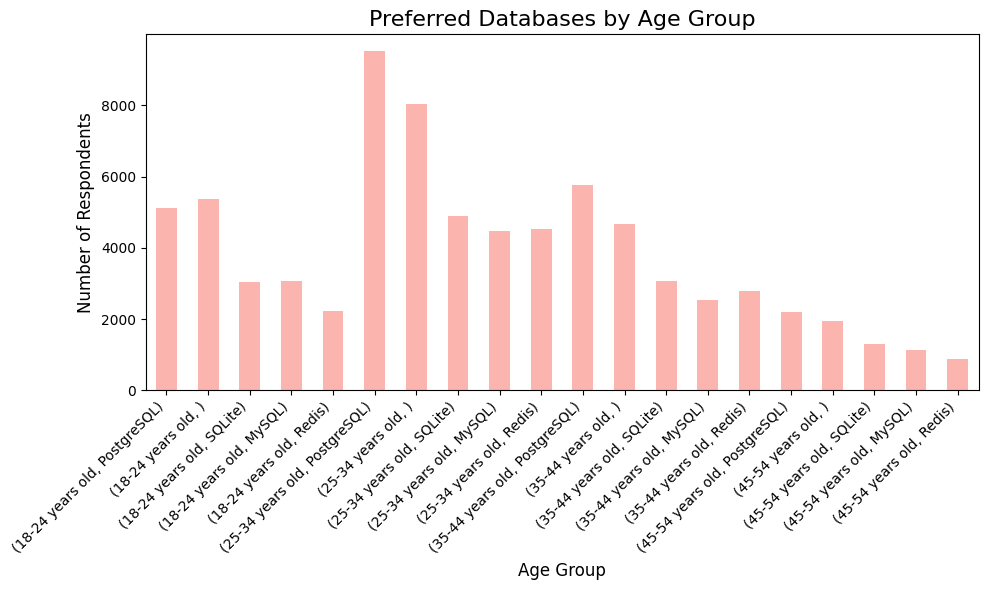

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "survey-data.csv"
df = pd.read_csv(file_path)

# Clean and preprocess the 'DatabaseWantToWorkWith' column
df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].fillna('')
df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].str.split(';')

# Filter the data for the relevant age groups
df_filtered = df[df['Age'].isin(['25-34 years old', '35-44 years old', '45-54 years old', '18-24 years old'])]

# Find the top 5 most popular databases across the filtered data
top_databases = df_filtered['DatabaseWantToWorkWith'].explode().value_counts().nlargest(5).index

# Create a new column to store only the top 5 databases for each respondent
df_filtered['TopDatabases'] = df_filtered['DatabaseWantToWorkWith'].apply(
    lambda x: [db for db in x if db in top_databases]
)

# Now we will count the occurrence of each database in the filtered dataset by age group
# Create a new DataFrame where each row is an age group, and the columns are the counts for each top database
age_groups = df_filtered.groupby('Age')['TopDatabases'].apply(lambda x: pd.Series({
    db: (x.apply(lambda y: db in y)).sum() for db in top_databases
}))

# Plot the stacked bar chart
ax = age_groups.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Pastel1')

# Add labels and title to the chart
plt.title('Preferred Databases by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout for clarity
plt.tight_layout()

# Show the chart
plt.show()


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


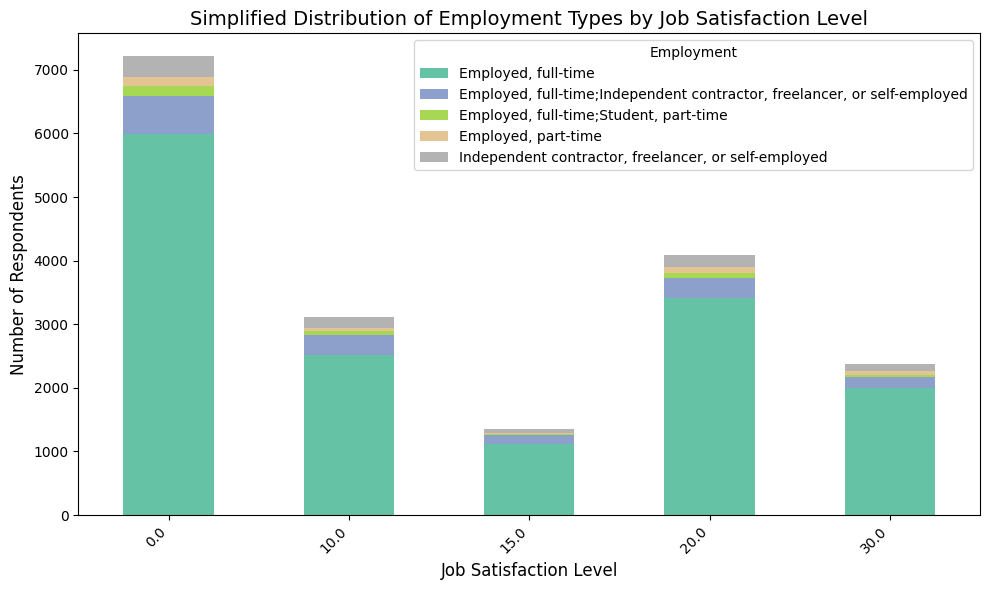

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "survey-data.csv"
df = pd.read_csv(file_path)

# Clean the data for 'JobSatPoints_6' and 'Employment' columns
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['Employment'] = df['Employment'].fillna('Unknown')

# Drop rows with missing values in 'JobSatPoints_6' or 'Employment'
df_filtered = df.dropna(subset=['JobSatPoints_6', 'Employment'])

# Filter for the top 5 most common job satisfaction levels and employment types
top_job_satisfaction = df_filtered['JobSatPoints_6'].value_counts().nlargest(5).index
top_employment_types = df_filtered['Employment'].value_counts().nlargest(5).index

# Filter the dataset to include only these top job satisfaction levels and employment types
df_filtered_top = df_filtered[df_filtered['JobSatPoints_6'].isin(top_job_satisfaction) &
                              df_filtered['Employment'].isin(top_employment_types)]

# Group by 'JobSatPoints_6' (Job Satisfaction) and 'Employment' (Employment Type)
# Get the count of each 'Employment' type within each 'JobSatPoints_6' (Job Satisfaction) level
job_satisfaction_distribution = df_filtered_top.groupby(['JobSatPoints_6', 'Employment']).size().unstack(fill_value=0)

# Plot a simpler stacked bar chart to compare employment types across job satisfaction levels
ax = job_satisfaction_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

# Add labels and title
plt.title('Simplified Distribution of Employment Types by Job Satisfaction Level', fontsize=14)
plt.xlabel('Job Satisfaction Level', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the chart
plt.tight_layout()
plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


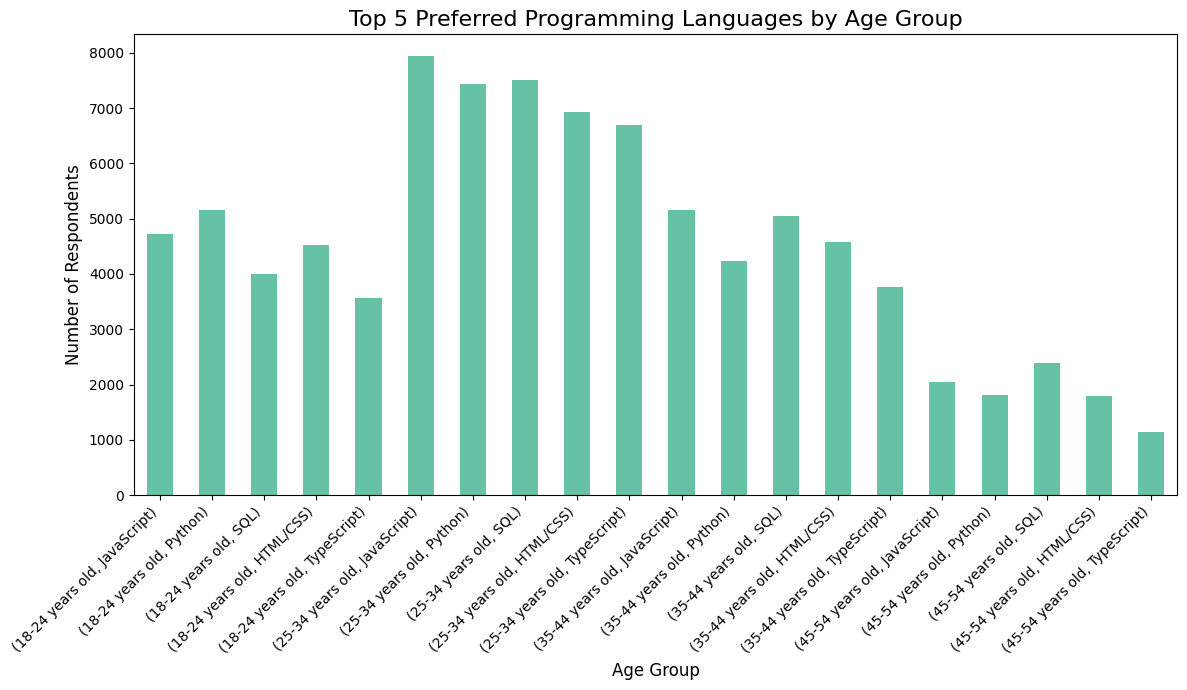

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "survey-data.csv"
df = pd.read_csv(file_path)

# Clean the data for 'LanguageAdmired' and 'Age' columns
df['LanguageAdmired'] = df['LanguageAdmired'].fillna('')
df['LanguageAdmired'] = df['LanguageAdmired'].str.split(';')

# Filter for the top 5 most admired languages
top_languages = df['LanguageAdmired'].explode().value_counts().nlargest(5).index

# Filter the dataset to only include the top 5 admired languages
df['TopLanguages'] = df['LanguageAdmired'].apply(
    lambda x: [lang for lang in x if lang in top_languages]
)

# Filter the data by age groups
age_groups = ['18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old']
df_filtered = df[df['Age'].isin(age_groups)]

# Group by 'Age' and calculate how many times each of the top 5 languages is admired in each group
age_groups_language = df_filtered.groupby('Age')['TopLanguages'].apply(
    lambda x: pd.Series({lang: (x.apply(lambda y: lang in y)).sum() for lang in top_languages})
)

# Plot a stacked bar chart
ax = age_groups_language.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Set2')

# Add labels and title
plt.title('Top 5 Preferred Programming Languages by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the chart
plt.tight_layout()
plt.show()


##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


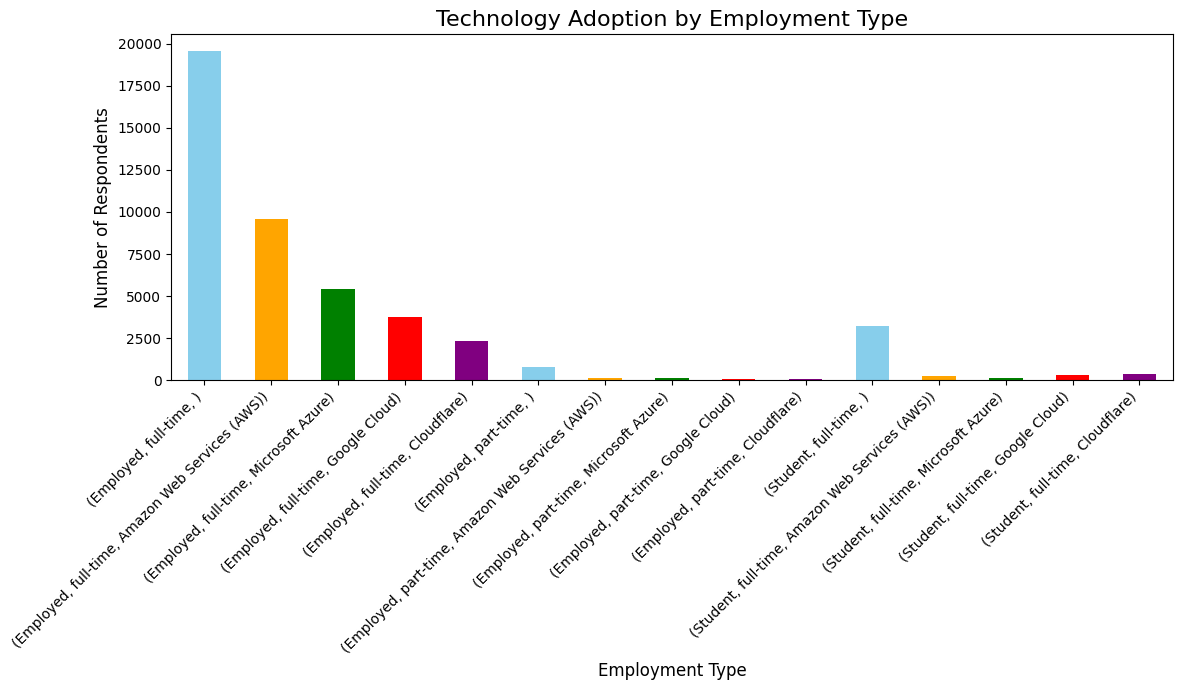

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "survey-data.csv"
df = pd.read_csv(file_path)

# Clean the data: Handle missing values and split the 'PlatformAdmired' column
df['PlatformAdmired'] = df['PlatformAdmired'].fillna('')
df['PlatformAdmired'] = df['PlatformAdmired'].str.split(';')

# Filter for relevant employment types (you can adjust the list as needed)
employment_types = ['Employed, full-time', 'Employed, part-time', 'Freelancer', 'Student, full-time']
df_filtered = df[df['Employment'].isin(employment_types)].copy()

# Find the top 5 most admired platforms across all respondents
top_platforms = df_filtered['PlatformAdmired'].explode().value_counts().nlargest(5).index

# Create a new column with only the top platforms for each respondent
df_filtered['TopPlatforms'] = df_filtered['PlatformAdmired'].apply(
    lambda x: [platform for platform in x if platform in top_platforms]
)

# Group by 'Employment' and calculate how many times each of the top platforms is admired in each group
employment_platforms = df_filtered.groupby('Employment')['TopPlatforms'].apply(
    lambda x: pd.Series({platform: (x.apply(lambda y: platform in y)).sum() for platform in top_platforms})
)

# Plot the stacked bar chart with raw counts (no normalization)
ax = employment_platforms.plot(kind='bar', stacked=True, figsize=(12, 7), color=['skyblue', 'orange', 'green', 'red', 'purple'])

# Add labels and title
plt.title('Technology Adoption by Employment Type', fontsize=16)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the chart
plt.tight_layout()
plt.show()


### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
